# Tathagata Mookherjee<br>
ROLL NUMBER - M21AI619<br>
Machine Learning Fractal 3, Assignment 1<br>
IIT JODHPUR<br>

epochs: 5 hidden_sizes: [128, 64, 32] learning_rate: 0.5 criterion: CrossEntropyLoss()
Epoch: 0 Training loss: 0.5661072770892176
Epoch: 1 Training loss: 0.27790678991501266
Epoch: 2 Training loss: 0.2798065874558776
Epoch: 3 Training loss: 0.339387568722624
Epoch: 4 Training loss: 1.0840906474842573
Training Time (in minutes): 8.78861934741338
Predicted Digit = 5
Model Accuracy = 0.117
epochs: 5 hidden_sizes: [128, 64, 32] learning_rate: 0.5 criterion: NLLLoss()
Epoch: 0 Training loss: 0.5732474389360912
Epoch: 1 Training loss: 0.2753986534136318
Epoch: 2 Training loss: 0.2974274638277699
Epoch: 3 Training loss: 0.34679816331047175
Epoch: 4 Training loss: 0.9762545524915652
Training Time (in minutes): 6.019794313112895
Predicted Digit = 3
Model Accuracy = 0.101
epochs: 5 hidden_sizes: [128, 64, 32] learning_rate: 0.05 criterion: CrossEntropyLoss()
Epoch: 0 Training loss: 0.9480503215305587
Epoch: 1 Training loss: 0.293257061892481
Epoch: 2 Training loss: 0.19433601260153469
Epoch: 3 T

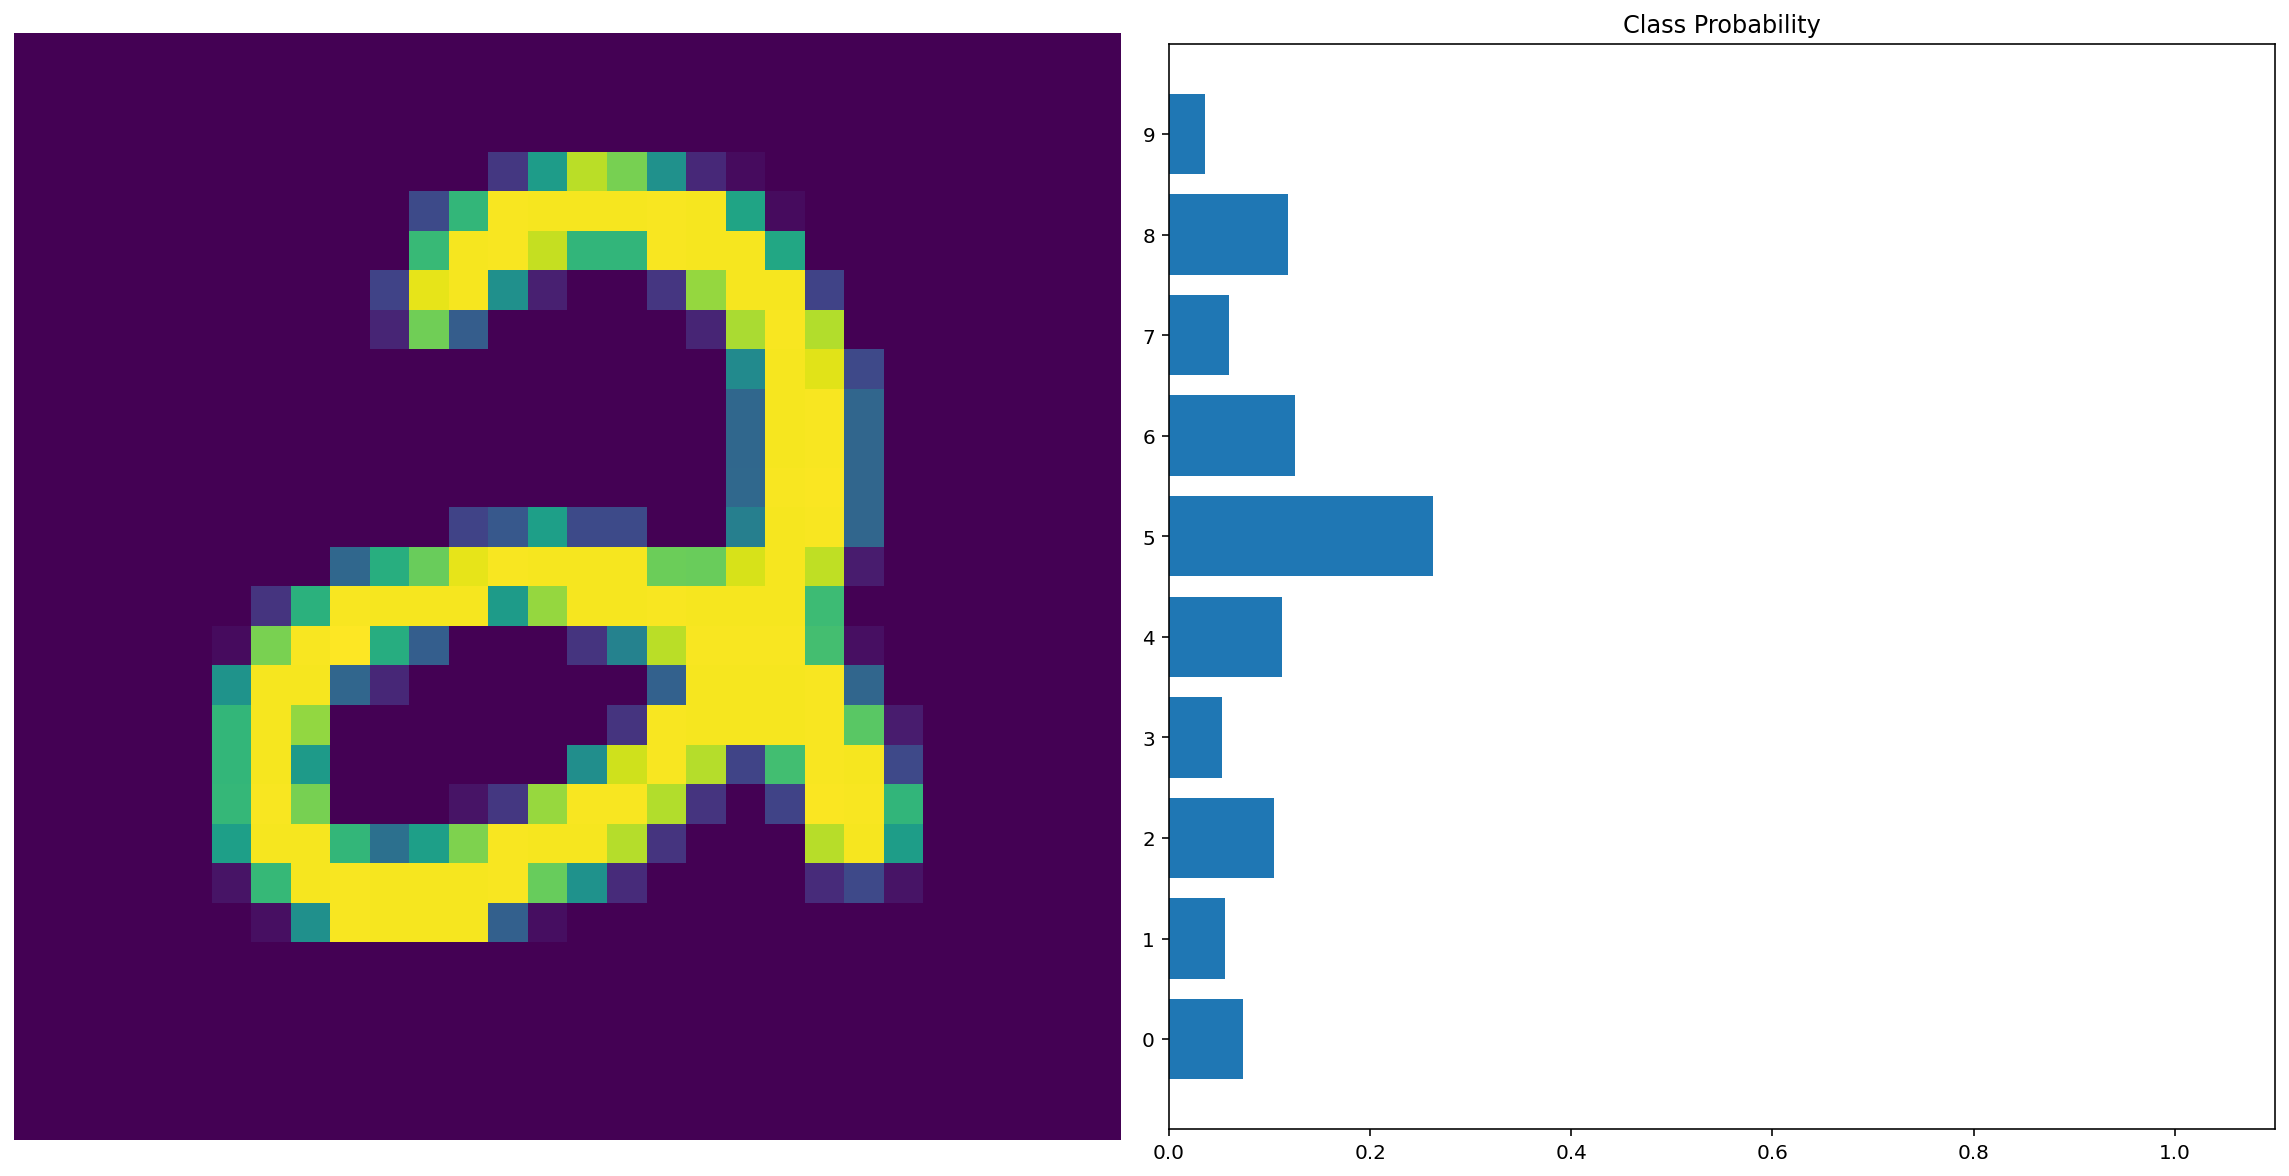

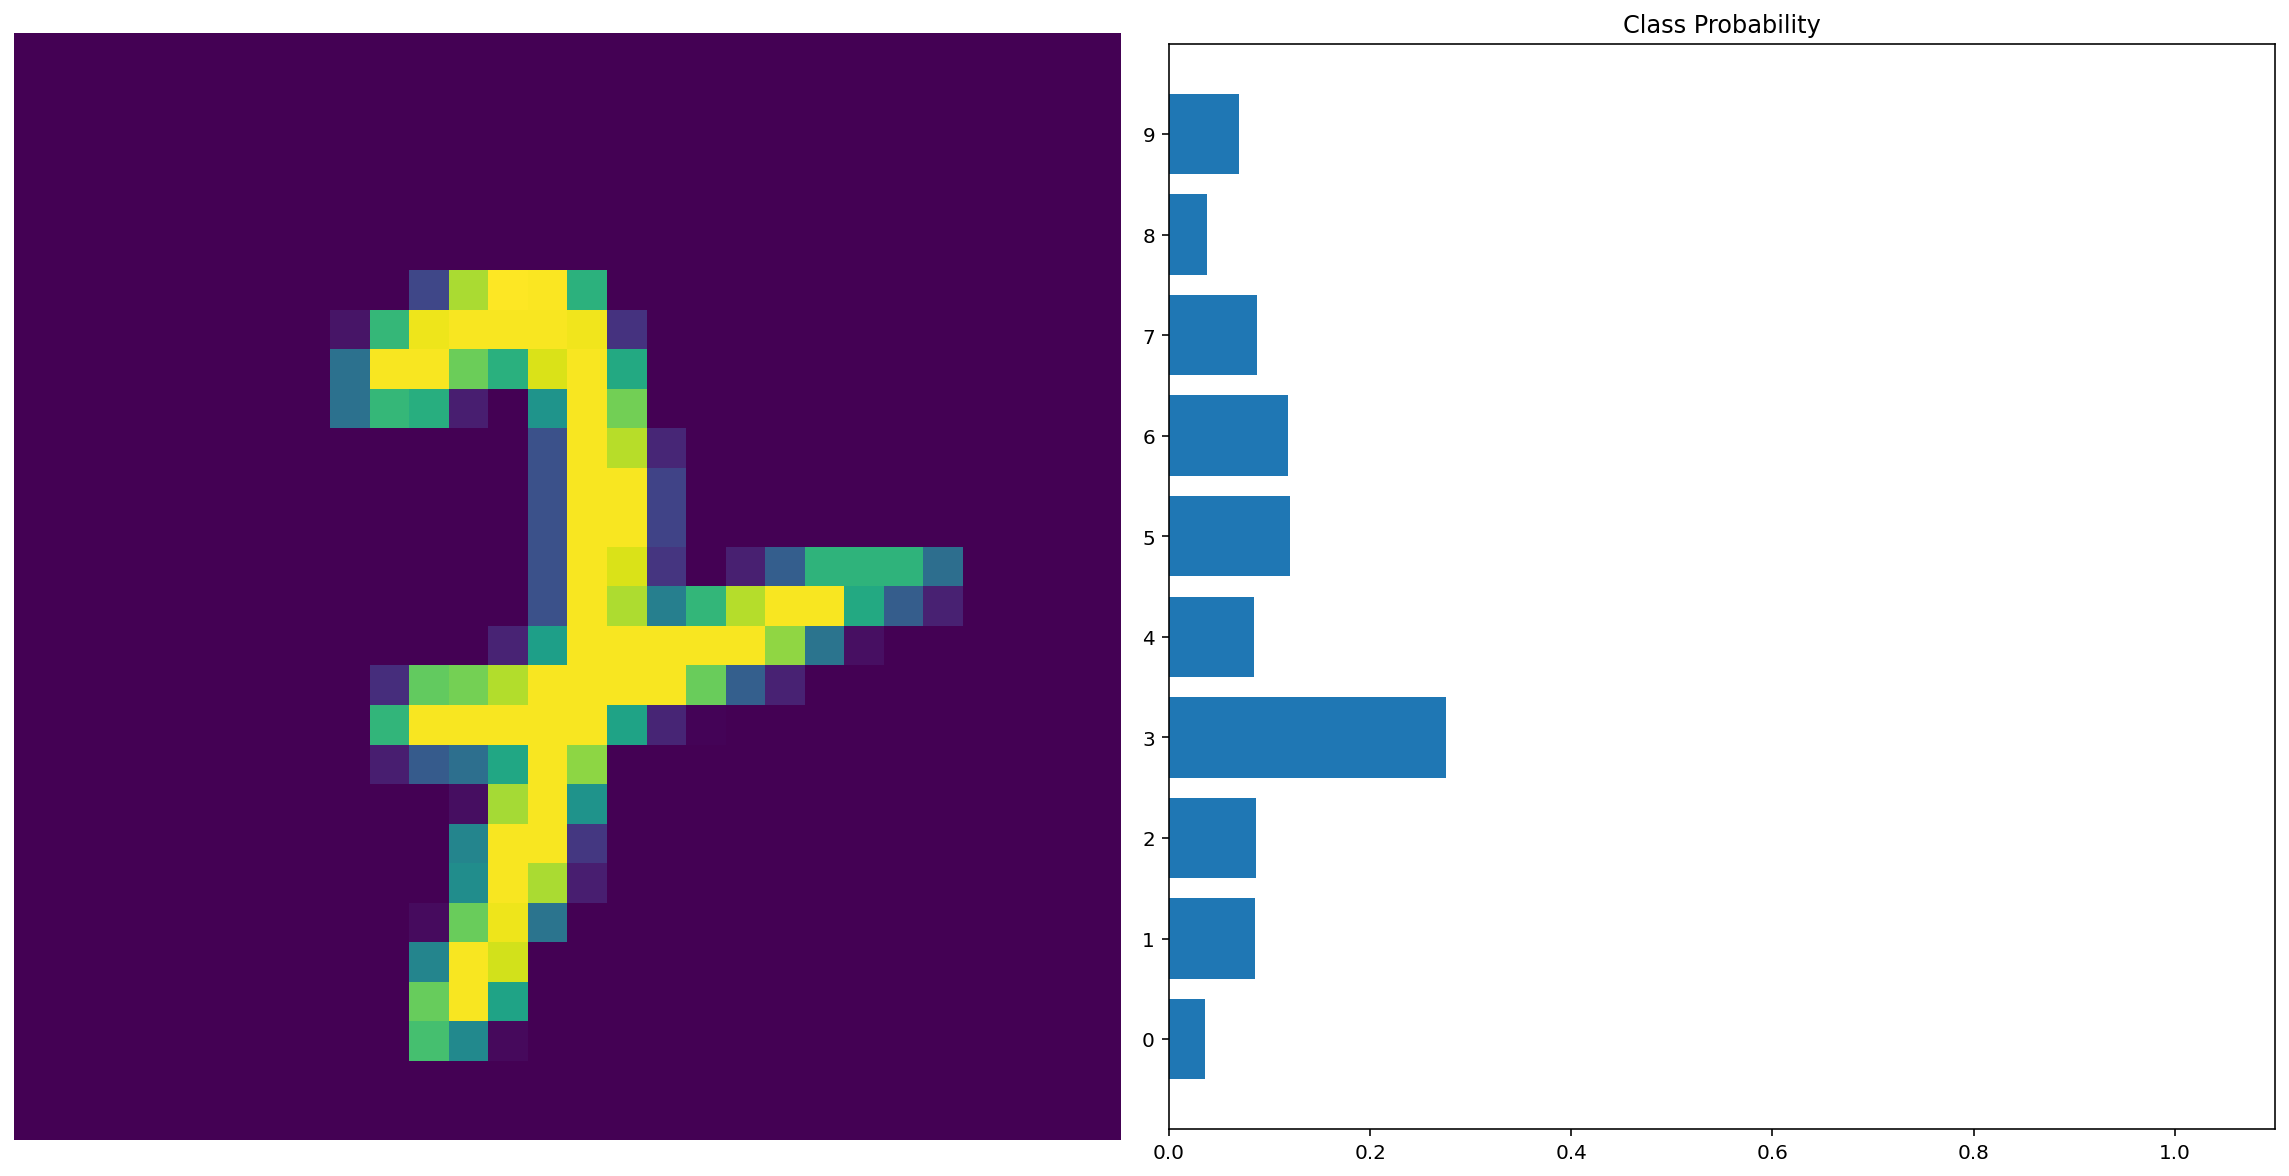

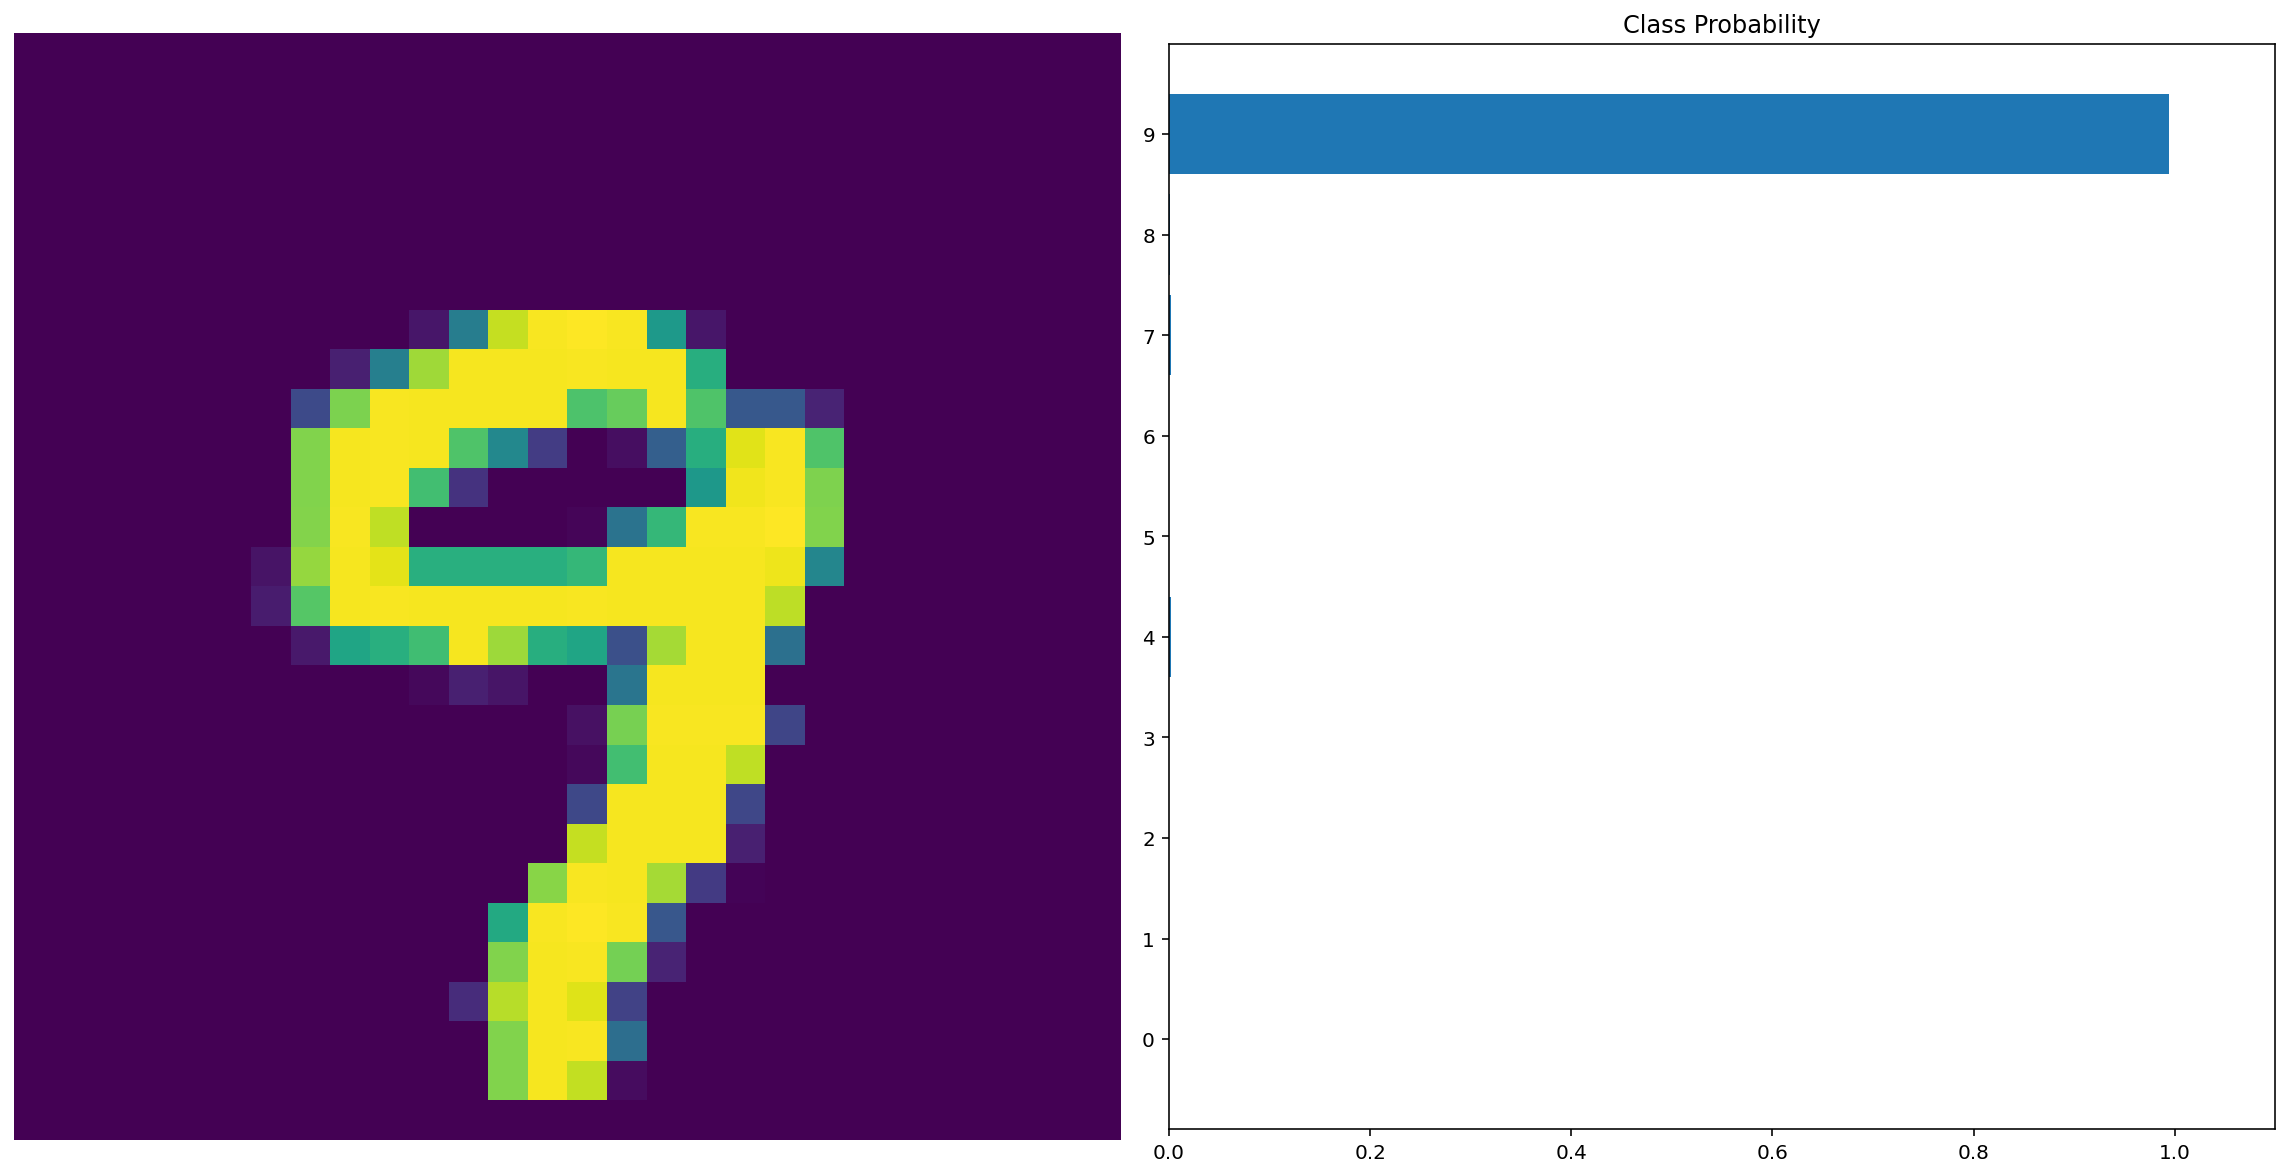

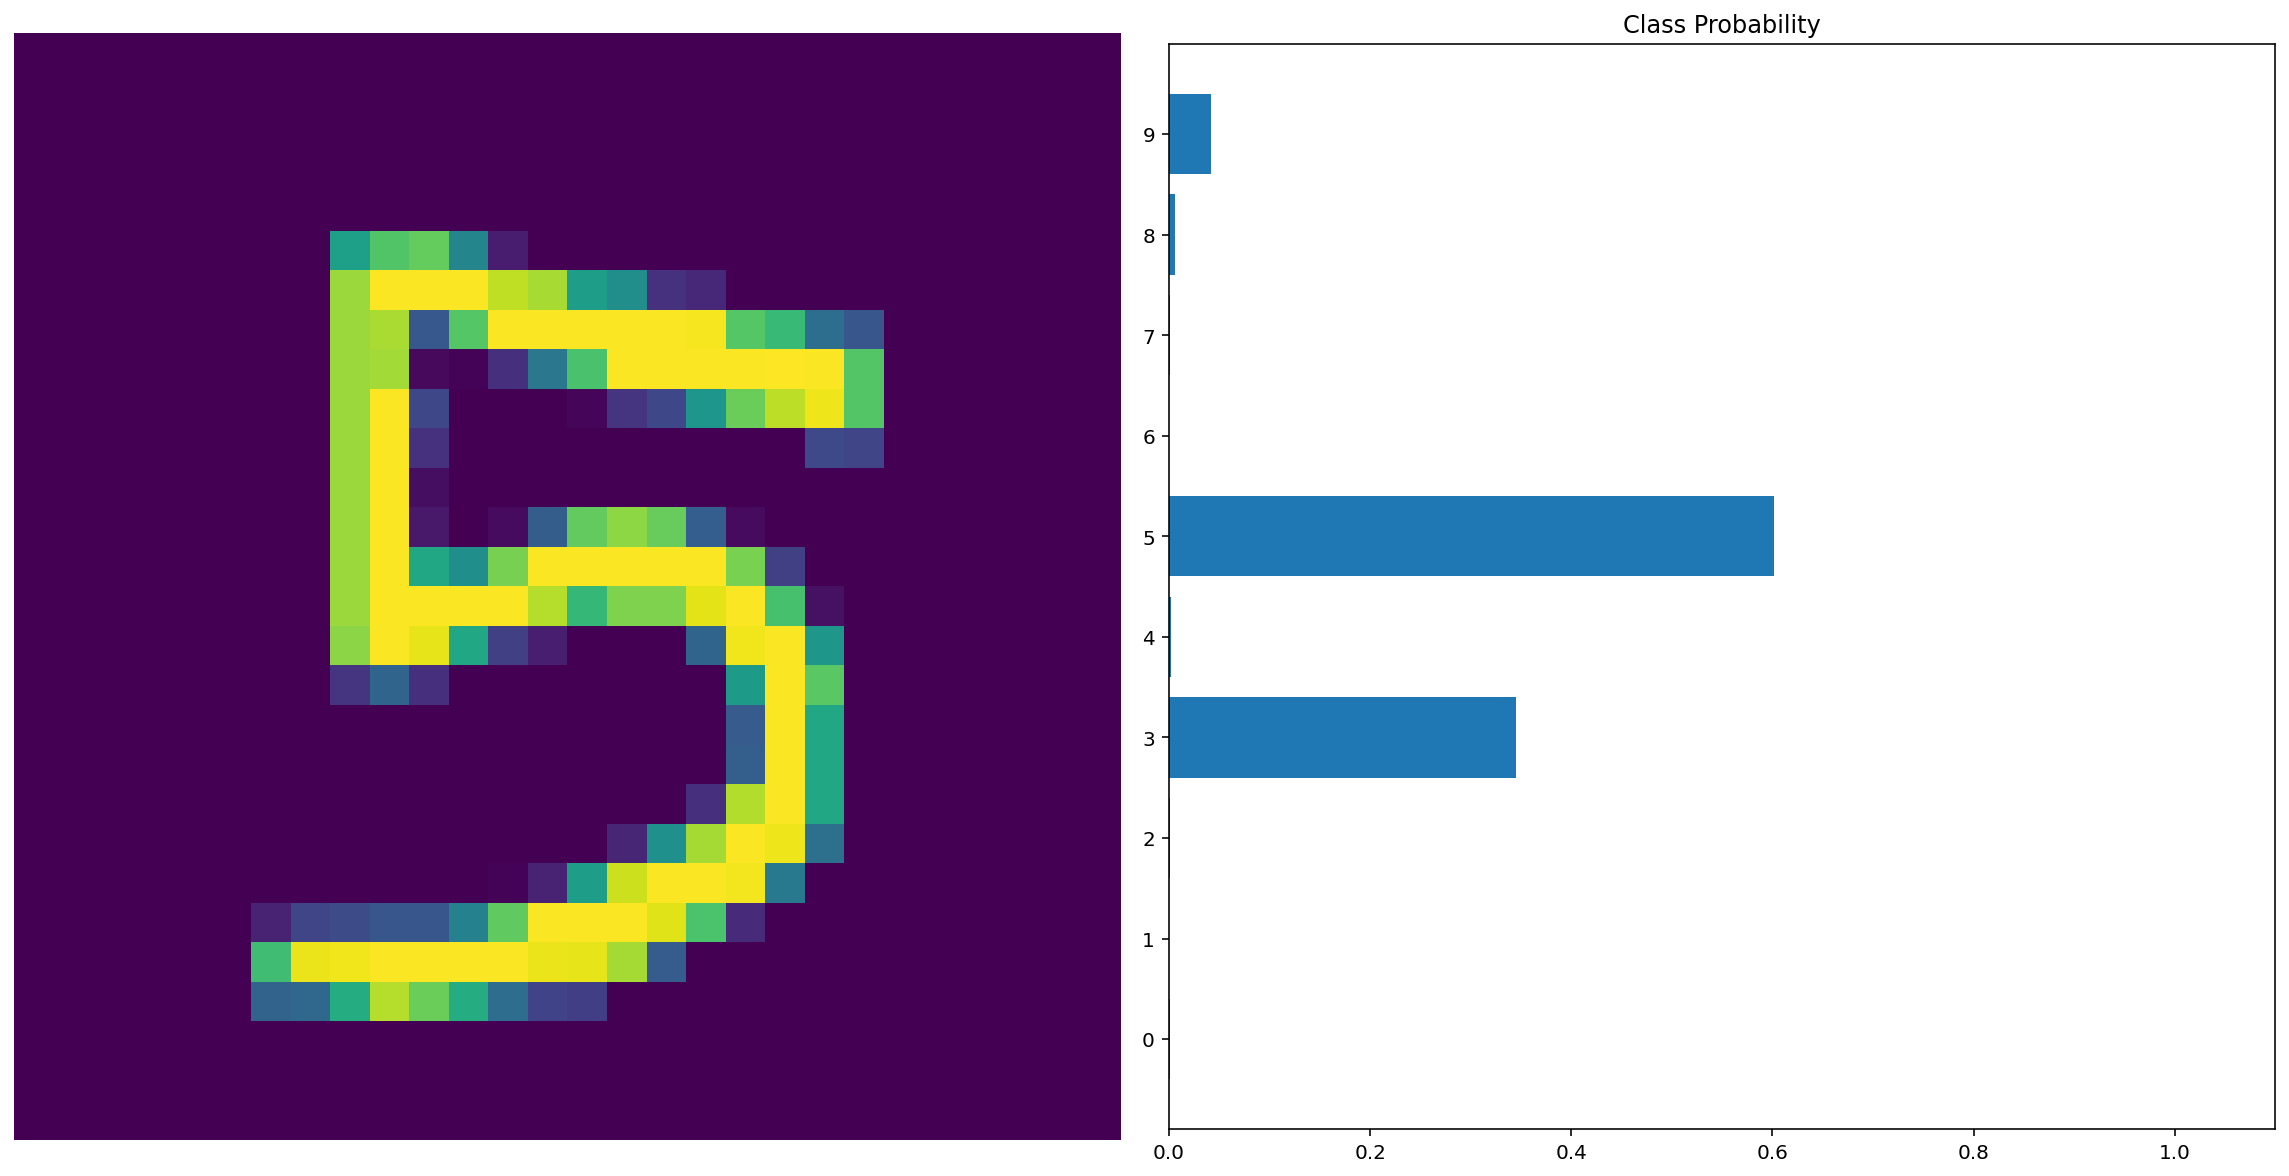

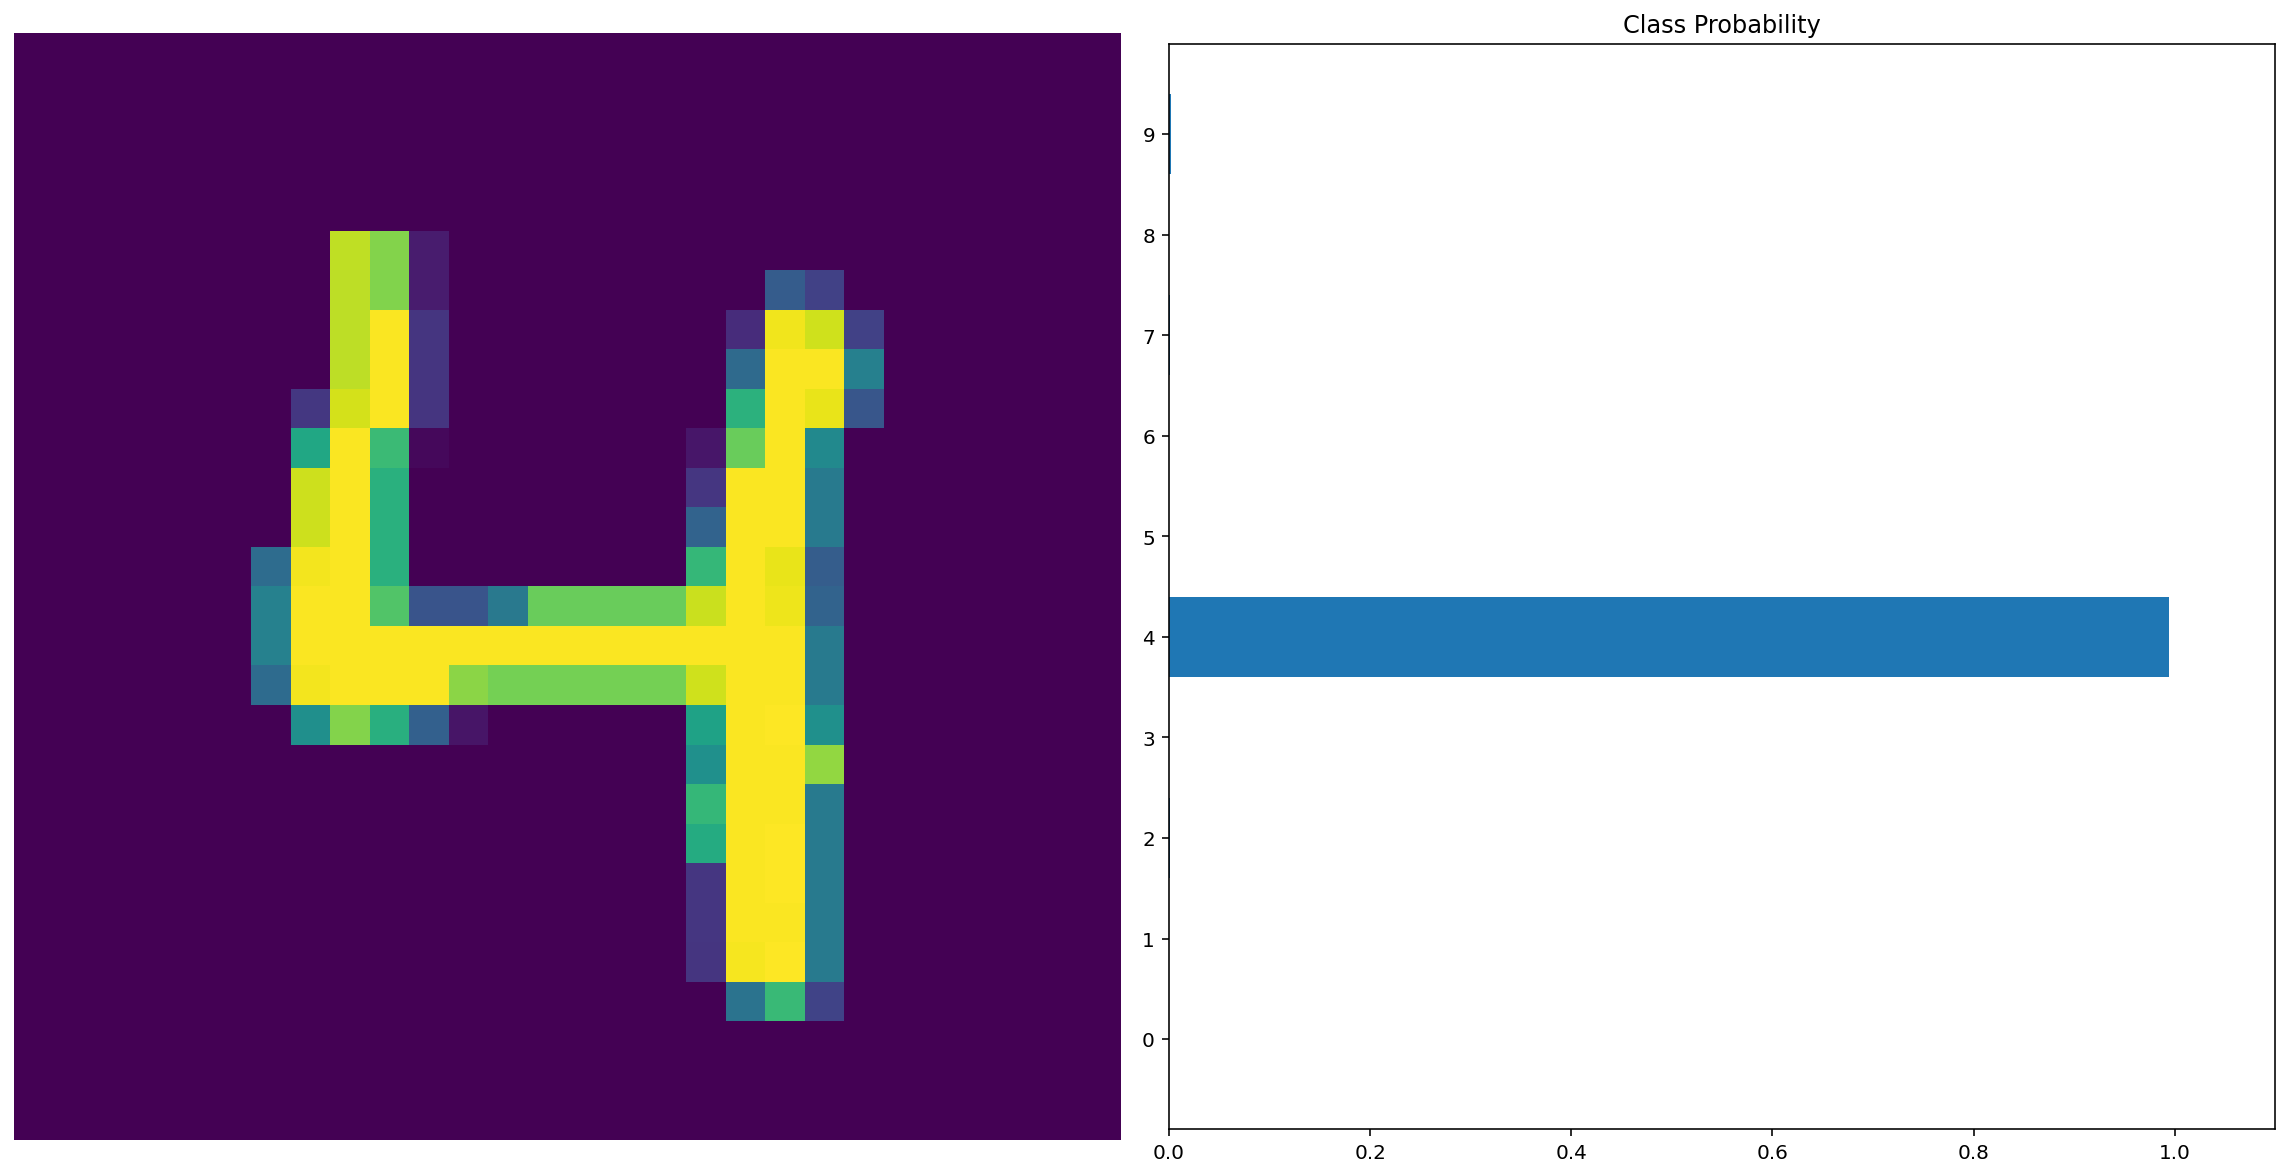

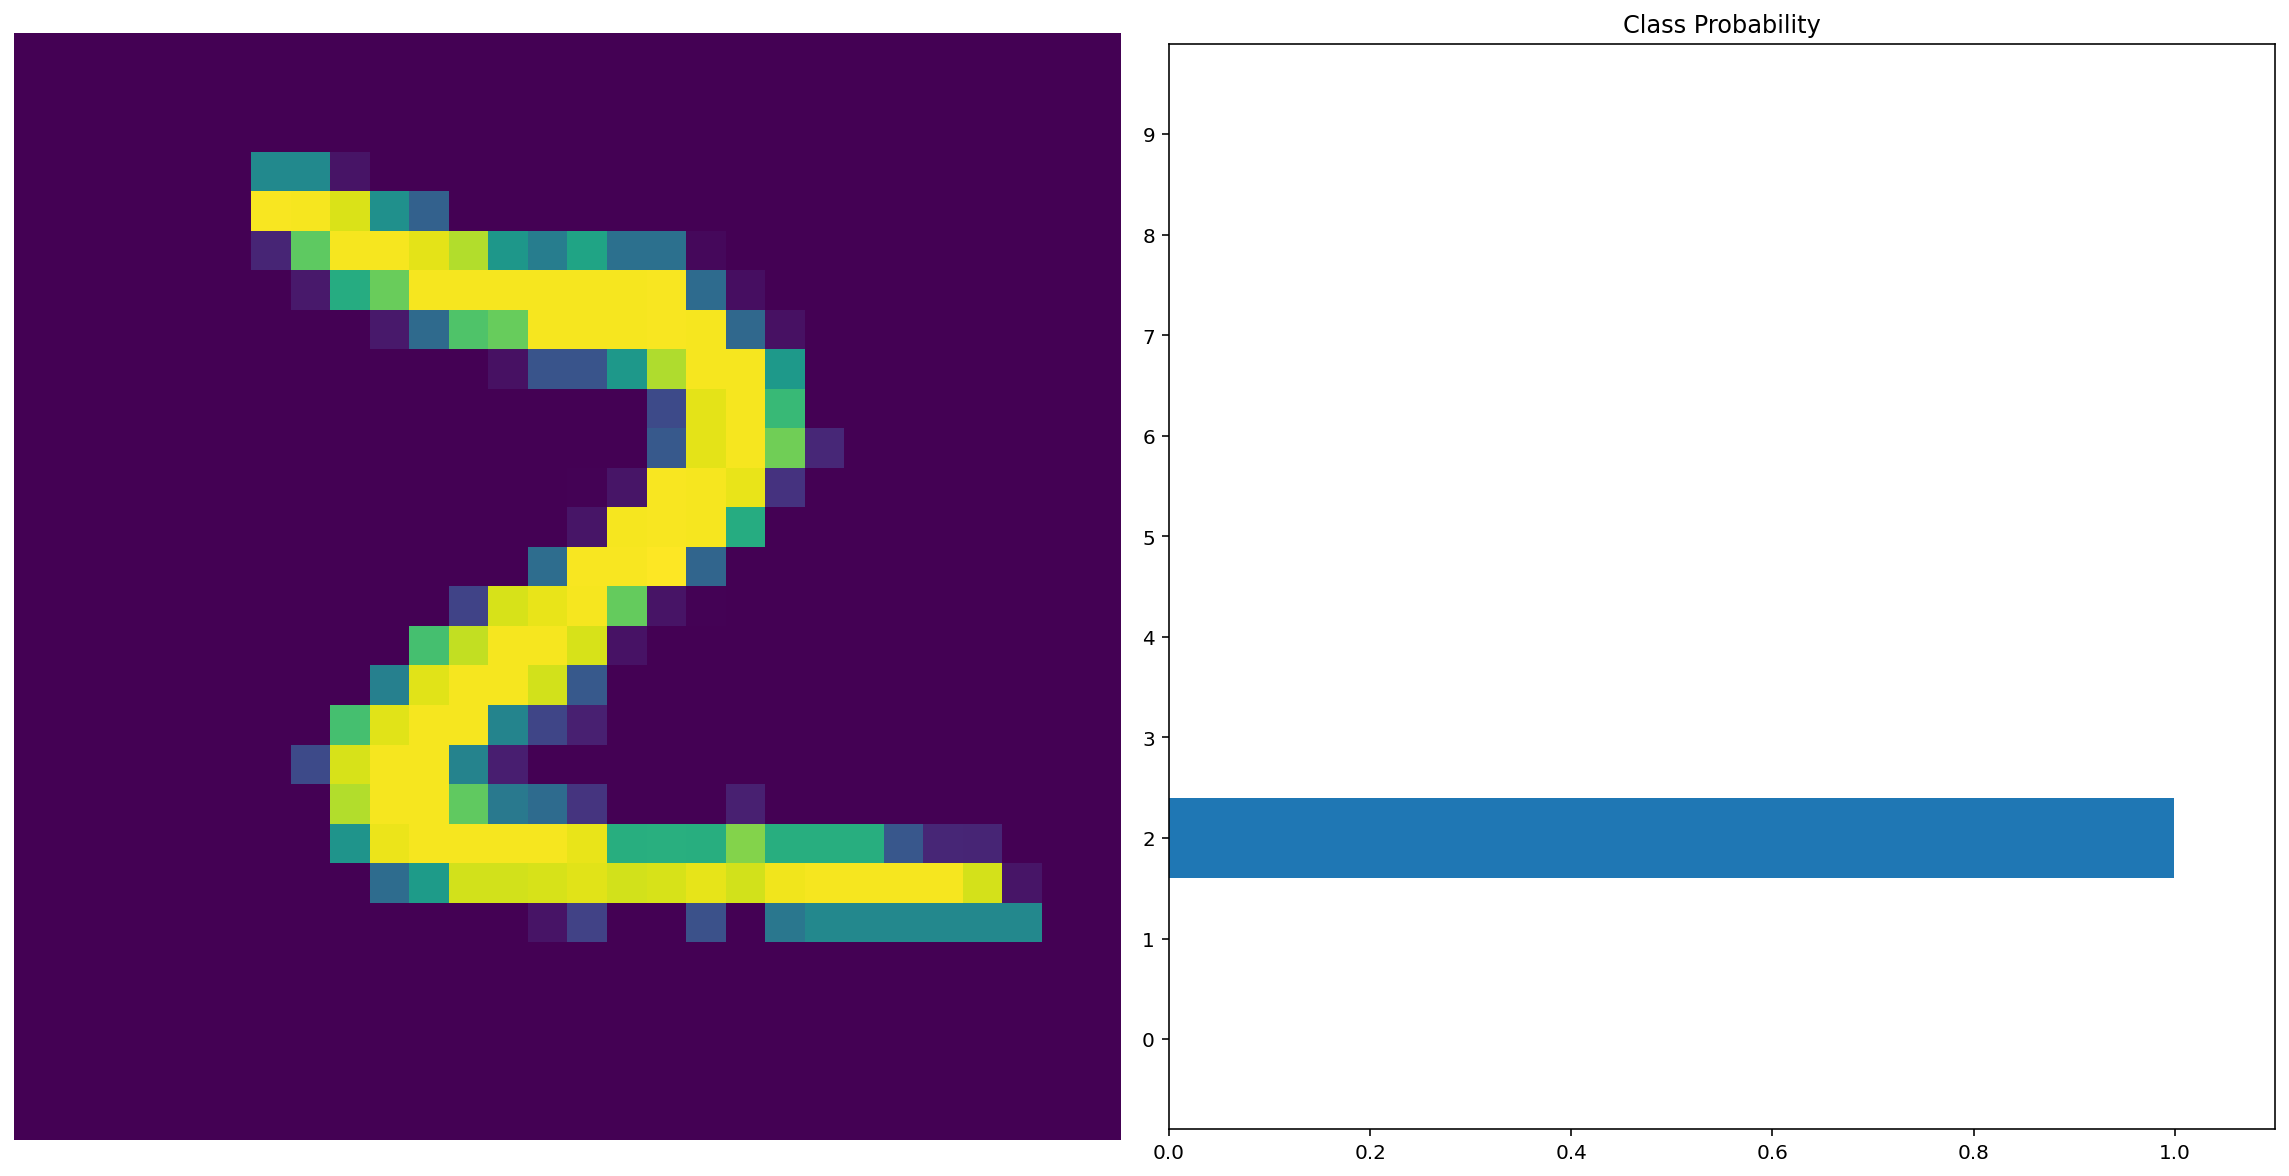

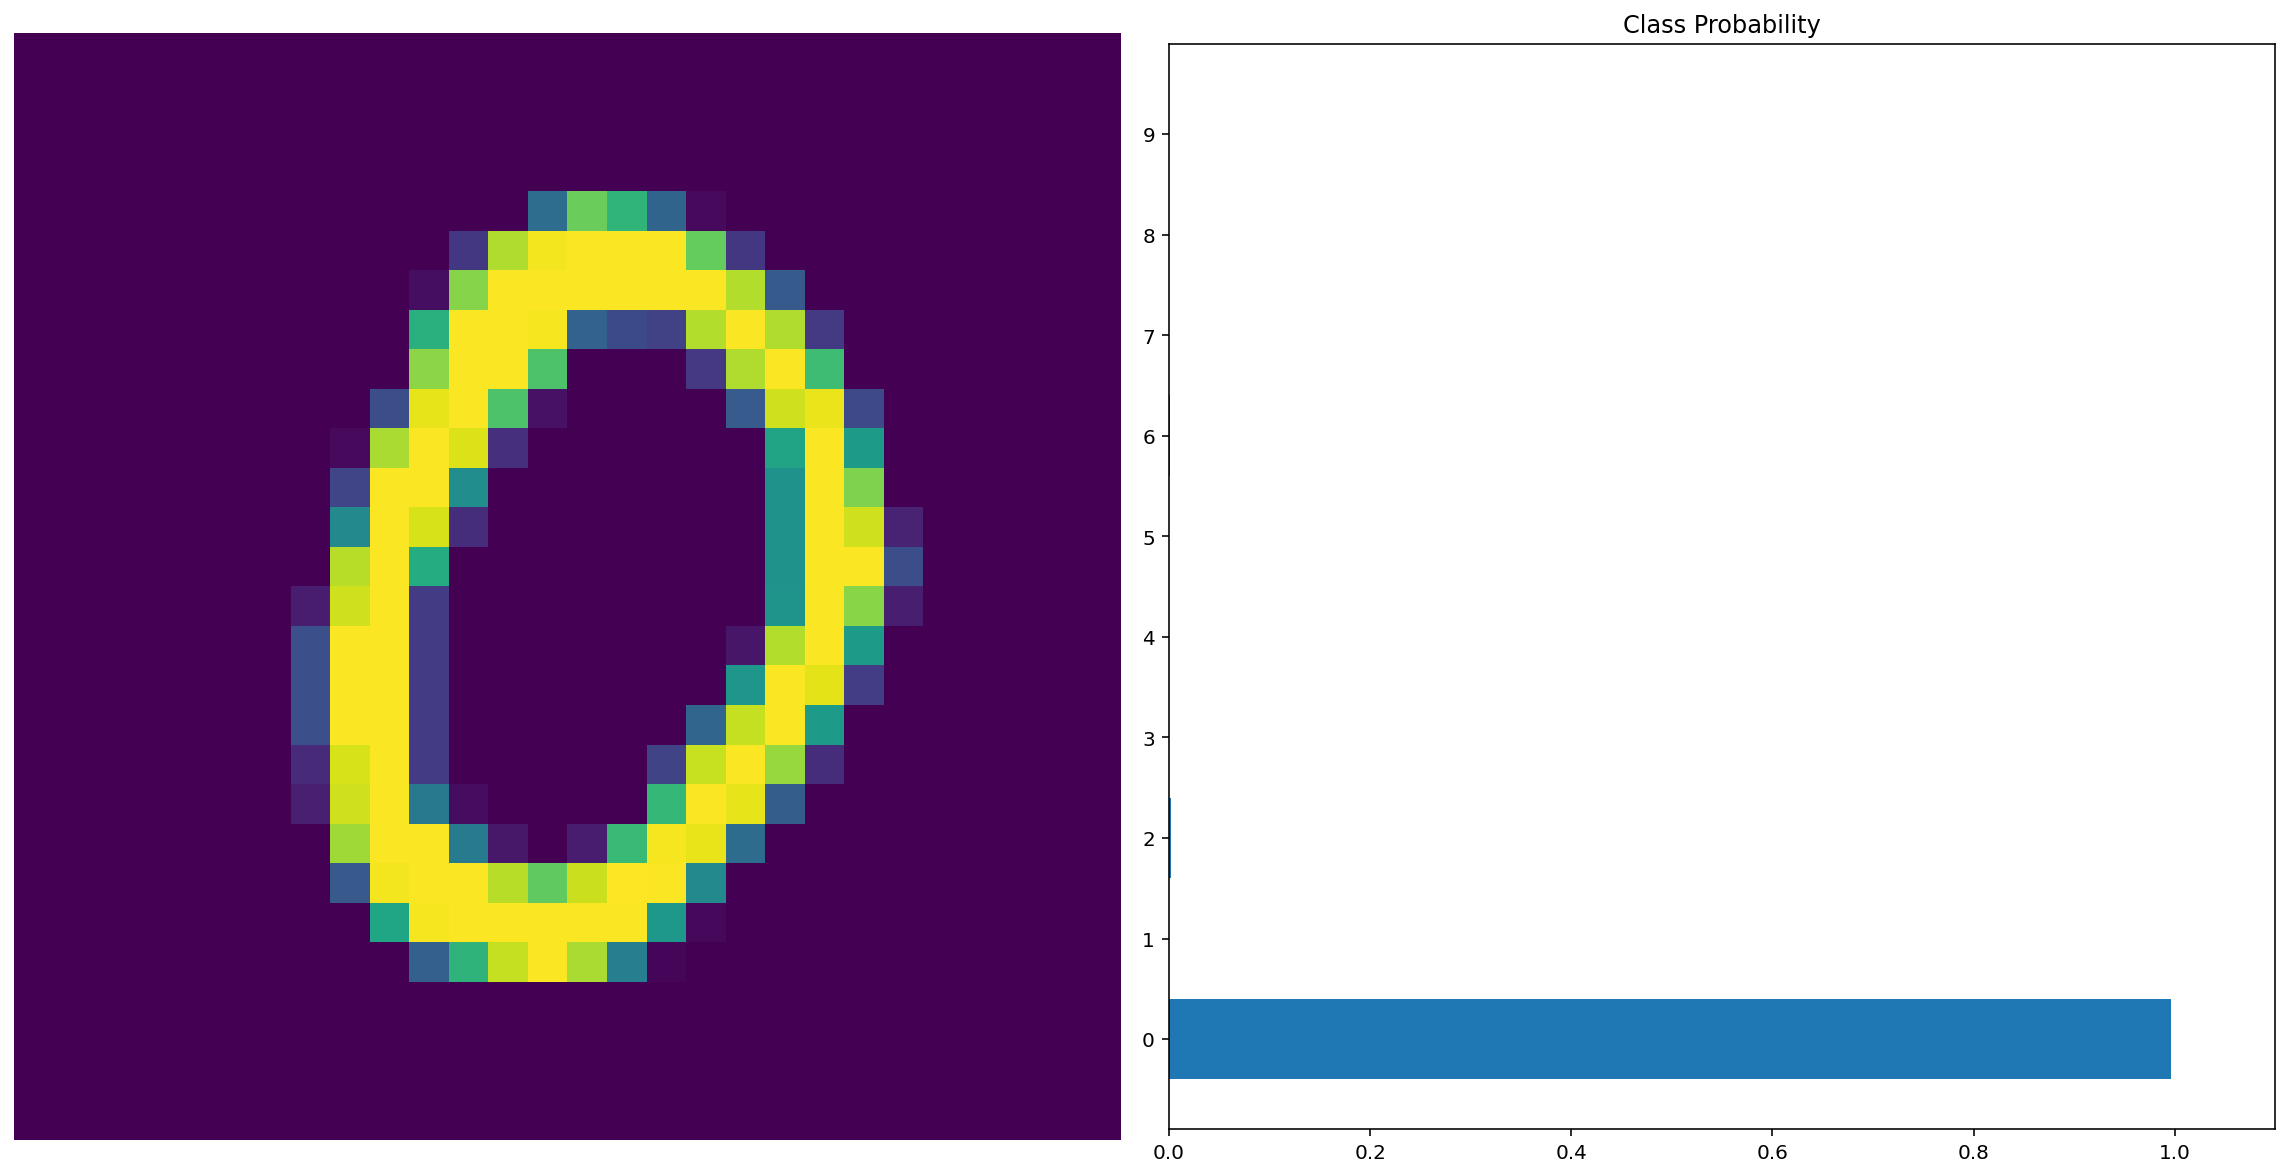

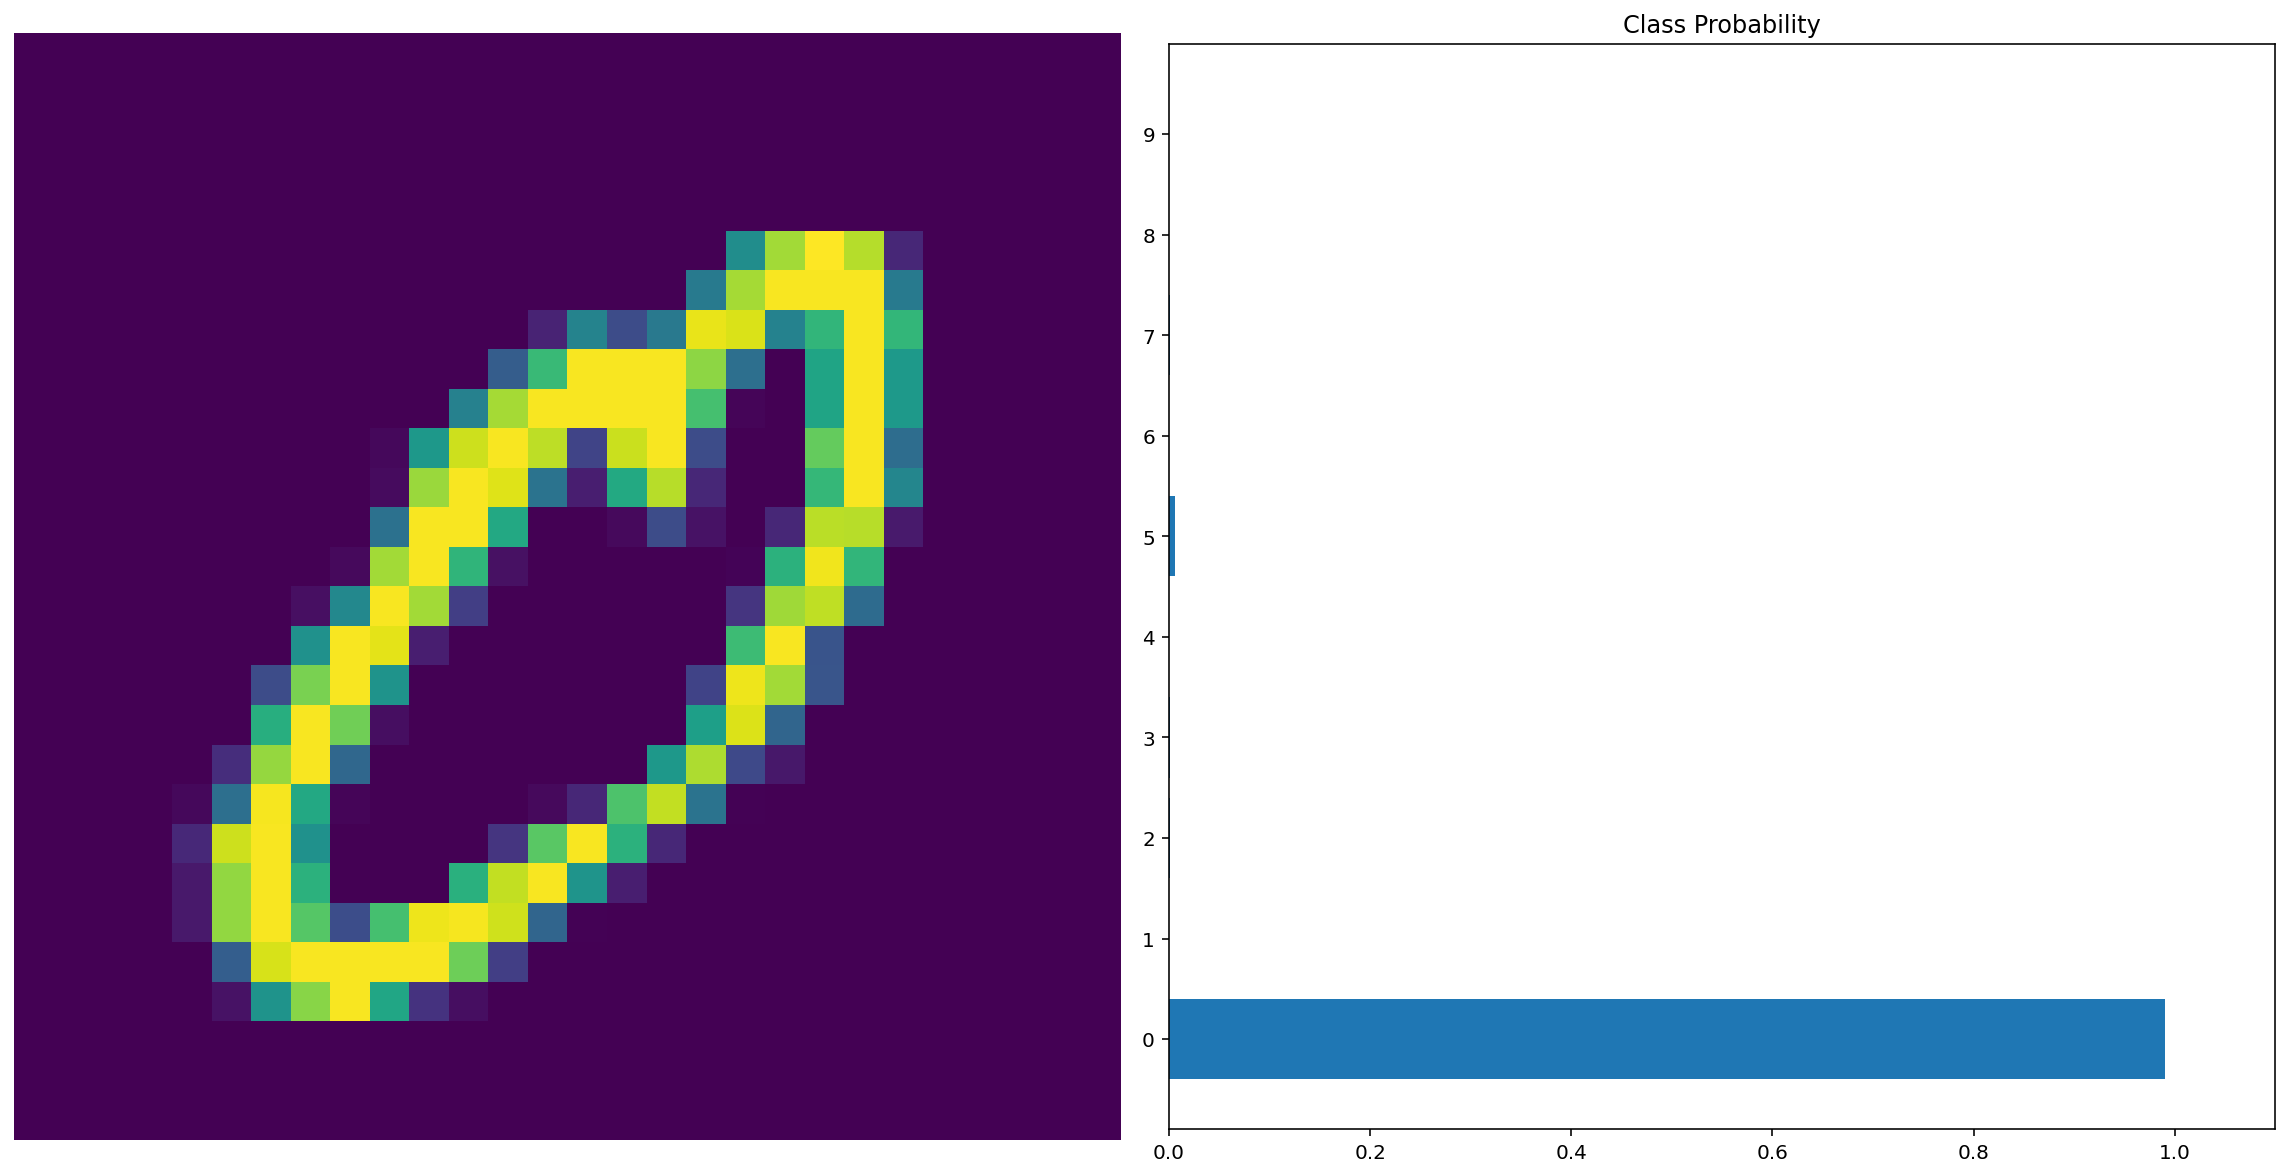

In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

def view_classify(img, ps):
    # Function for viewing an image
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(16,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


def run_network(epochs, hidden_sizes, learning_rate, criterion):
    # Learning details for the neural network
    input_size = 784
    output_size = 10

    # Define a transform to normalize the data
    transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

    # Download and load the training data
    trainset = datasets.MNIST('', download=False, train=True, transform=transform)
    valset = datasets.MNIST('', download=False, train=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    num_of_images = 60

    # Build a feed-forward network
    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.Sigmoid(),
                        nn.Linear(hidden_sizes[2], output_size),
                        nn.LogSoftmax(dim=1))

    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0], -1)

    logps = model(images)
    loss = criterion(logps, labels)

    loss.backward()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)

    images, labels = next(iter(trainloader))
    images.resize_(64, 784)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    time0 = time()

    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        else:
            print('Epoch: '+str(e)+' Training loss: '+str(running_loss/len(trainloader)))

    print("Training Time (in minutes): "+str((time()-time0)/60))
    images, labels = next(iter(valloader))
    img = images[0].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    correct_count, all_count = 0, 0

    for images,labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

    print("Predicted Digit =", probab.index(max(probab)))
    view_classify(img.view(1, 28, 28), ps)
    print("Model Accuracy =", (correct_count/all_count))


#configurable parameters
epoch_array = [5]
hidden_size_array = [[128, 64, 32], [256, 128, 64]]
learning_rate_array=[0.5, 0.05]
criterion_array = [nn.CrossEntropyLoss(), nn.NLLLoss()]

for hidden_sizes in hidden_size_array:
    for learning_rate in learning_rate_array:
        for criterion in criterion_array:
            for epochs in epoch_array:
                print('epochs: '+str(epochs)+' hidden_sizes: '+str(hidden_sizes)+' learning_rate: '+str(learning_rate)+' criterion: '+str(criterion))
                run_network(epochs, hidden_sizes, learning_rate, criterion)